**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

#Gradient boosting
Gradient boosting is a powerful machine learning algorithm that belongs to the family of ensemble methods. Ensemble methods combine multiple "weak" learners (models that perform slightly better than random chance) to create a "strong" learner with significantly improved predictive accuracy.

Here's a breakdown of how gradient boosting works:

**1. Sequential Learning:**

Unlike some ensemble methods like Random Forest, which train models in parallel, gradient boosting builds models sequentially.
Each new model is trained to correct the errors made by the previous models in the sequence.

**2. Weak Learners (Usually Decision Trees):**

Gradient boosting typically uses decision trees as its weak learners. These are simple tree-like models that make decisions based on a series of "if-then-else" rules.
These trees are usually "shallow," meaning they have a limited number of levels or splits, making them weak learners on their own.

**3. Loss Function:**

A loss function measures how well the model is performing. It quantifies the difference between the predicted values and the actual values.
Examples of loss functions include mean squared error (for regression problems) and log loss (for classification problems).

**4. Gradient Descent:**

This is where the "gradient" part of gradient boosting comes in. Gradient descent is an optimization algorithm used to find the minimum of a function (in this case, the loss function).
In each iteration, gradient boosting calculates the gradient (the direction of steepest ascent) of the loss function with respect to the predictions of the current ensemble.
It then trains a new weak learner to minimize this gradient, effectively reducing the errors made by the previous models.

**5. Combining the Weak Learners:**

The predictions of each weak learner are combined to form the final prediction of the ensemble.
The contribution of each learner is weighted based on its performance.
Here's a simplified analogy:

Imagine you're trying to predict the price of a house.


**Key Advantages of Gradient Boosting:**

**High accuracy:** Gradient boosting is known for its excellent predictive performance, often outperforming other machine learning algorithms.

Handles different data types: It can handle both numerical and categorical data.

Robust to outliers: It is less sensitive to outliers in the data compared to some other algorithms.

**Key Disadvantages of Gradient Boosting:**

Computationally expensive: Training gradient boosting models can be computationally intensive, especially with large datasets.

Overfitting: It can be prone to overfitting if not properly tuned.


**Let's delve deeper into Gradient Boosting, including a more step-by-step explanation with a focus on the underlying functions. We'll focus on regression for simplicity, using Mean Squared Error (MSE) as the loss function.**

**1. Initialization:**

We start by making an initial prediction, often the average of the target variable (y). This is our first "weak learner" or base model (F₀(x)).

F₀(x) = average(y)

**2. Iterative Process (for m iterations):**

For each iteration (from 1 to m):

a. Calculate Residuals (Pseudo-residuals): These are the errors made by the current ensemble. In the case of MSE, the residual is simply the difference between the actual value (yᵢ) and the current prediction (Fₘ₋₁(xᵢ)).

rᵢₘ = yᵢ - Fₘ₋₁(xᵢ) (for each data point i)

b. Train a Weak Learner (Decision Tree): A new decision tree (hₘ(x)) is trained to predict these residuals. The tree tries to find splits in the features (x) that best reduce the variance of the residuals. This tree is typically shallow (low depth).

c. Calculate the Optimal Output Value for each Leaf: For each leaf j in the newly grown tree hₘ(x), we calculate an optimal output value (γₘⱼ) that minimizes the loss function within that leaf. For MSE, this is simply the average of the residuals in that leaf.

γₘⱼ = average(rᵢₘ) for all i where xᵢ falls into leaf j

d. Update the Ensemble: The new tree (scaled by a learning rate, ν) is added to the existing ensemble. The learning rate (typically a small value like 0.1 or 0.01) scales the contribution of each tree, preventing overfitting.

Fₘ(x) = Fₘ₋₁(x) + ν * γₘⱼ * hₘ(x) (where hₘ(x) outputs 1 if x falls in leaf j, and 0 otherwise)

**3. Final Prediction:**

After m iterations, the final prediction of the gradient boosting model is the sum of all the weak learners:

F(x) = F₀(x) + ν * Σ(γₘⱼ * hₘ(x)) (summed over all trees m and their leaves j)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
# 1. Generate Sample Data (House Prices based on Size)
np.random.seed(0)  # for reproducibility
X = np.sort(5 * np.random.rand(80, 1), axis=0) #feature
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) #target

In [3]:
# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# 3. Gradient Boosting Implementation (Step-by-Step)
n_estimators = 3  # Number of trees (iterations)
learning_rate = 0.1
predictions = np.zeros_like(y_train, dtype=float) #initilize predictions to 0


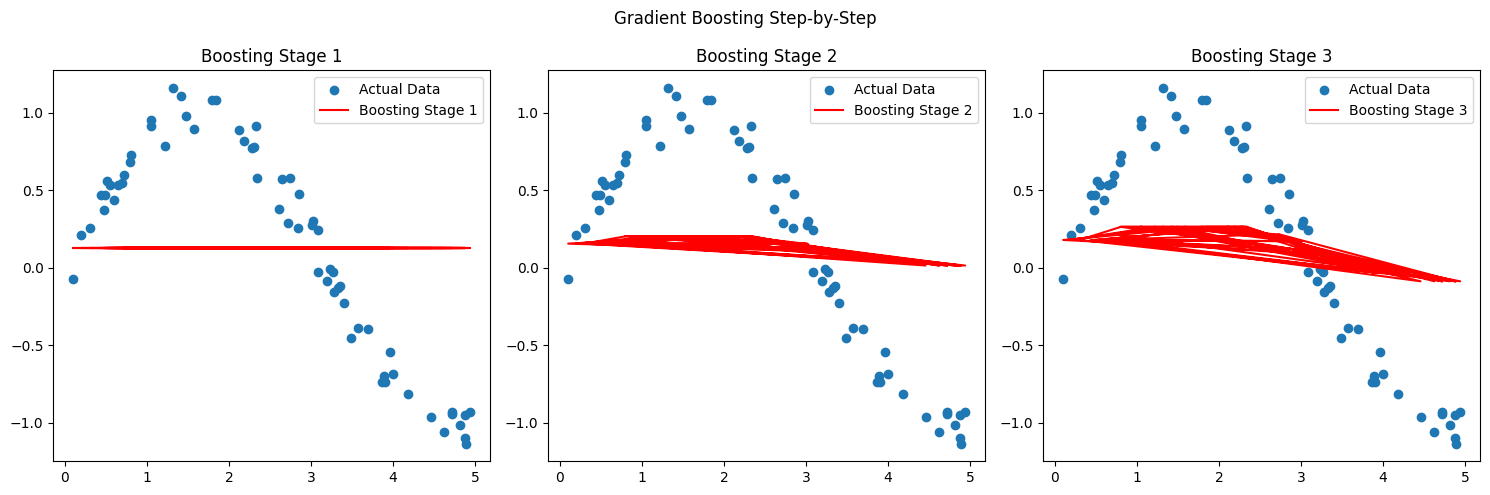

In [5]:
plt.figure(figsize=(15, 5))

for i in range(n_estimators):
    if i == 0:
        # Initialize with the mean of the target variable
        predictions = np.full(y_train.shape, np.mean(y_train))
    else:
        # Calculate residuals
        residuals = y_train - predictions

        # Train a decision tree on the residuals
        tree = DecisionTreeRegressor(max_depth=3) #weak learner
        tree.fit(X_train, residuals)

        # Make predictions with the tree
        tree_predictions = tree.predict(X_train)

        # Update the ensemble (predictions)
        predictions += learning_rate * tree_predictions

    # Plotting the predictions at each stage
    plt.subplot(1, n_estimators, i + 1)
    plt.scatter(X_train, y_train, label="Actual Data")
    plt.plot(X_train, predictions, color='red', label=f"Boosting Stage {i+1}")
    plt.title(f"Boosting Stage {i+1}")
    plt.legend()

plt.suptitle("Gradient Boosting Step-by-Step")
plt.tight_layout()
plt.show()

In [6]:
# 4. Using scikit-learn's GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)
gb_predictions = gb_reg.predict(X_test)

In [7]:
# 5. Evaluate the Model
mse = mean_squared_error(y_test, gb_predictions)
print(f"Mean Squared Error on Test Set (scikit-learn): {mse}")

Mean Squared Error on Test Set (scikit-learn): 0.018495753055502544


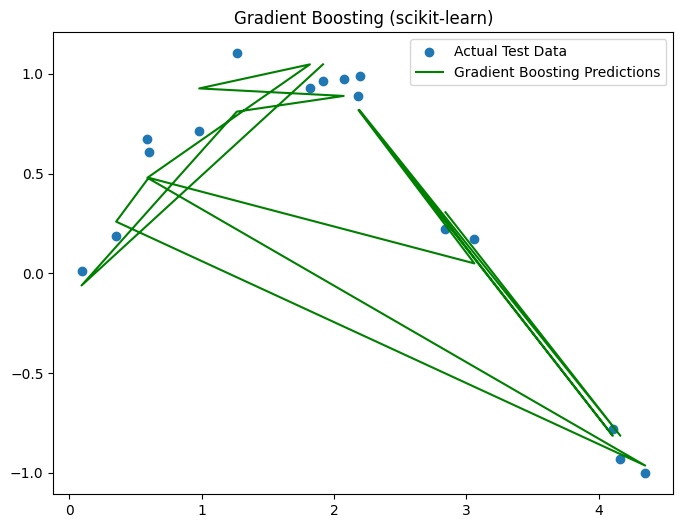

In [8]:
# Plotting the final result of scikit-learn's GradientBoostingRegressor
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label="Actual Test Data")
plt.plot(X_test, gb_predictions, color='green', label="Gradient Boosting Predictions")
plt.title("Gradient Boosting (scikit-learn)")
plt.legend()
plt.show()

In [9]:
#Example of how to get feature importance
feature_importances = gb_reg.feature_importances_
print(f"Feature Importances: {feature_importances}")

Feature Importances: [1.]




# XGBoost (Extreme Gradient Boosting)

**How it works:**

XGBoost ("Extreme Gradient Boosting") is a highly optimized and efficient implementation of the gradient boosting algorithm. It builds upon the basic principles of GB and incorporates several key enhancements:

*   **Regularization (L1 and L2):** Adds regularization terms to the loss function to penalize complex models and prevent overfitting. L1 regularization (Lasso) encourages sparsity in the feature weights, while L2 regularization (Ridge) shrinks the weights towards zero.

*   **Tree Pruning:** Employs more sophisticated tree pruning techniques, such as early stopping and post-pruning, to control tree complexity and prevent overfitting.

*   **Parallel Processing:** Supports parallel tree building and other computations, significantly speeding up training, especially on large datasets and multi-core processors.

*   **Handling Missing Values:** Can natively handle missing values in the data by learning the best direction to go at each split for missing values. This avoids the need for imputation.

*   **Second-order Gradient Approximation:** Uses a second-order Taylor approximation of the loss function, providing more accurate gradient information and faster convergence. This allows XGBoost to capture more complex relationships in the data.

**Key Differences from GB:**

*   **Speed and Performance:** XGBoost is significantly faster and often achieves superior predictive performance due to its optimizations, regularization, and handling of missing values.

*   **Regularization:** Built-in L1 and L2 regularization is a key advantage.

*   **Advanced Features:** Offers more advanced features such as handling missing values, parallel processing, and cross-validation.

# LightGBM (Light Gradient Boosting Machine)

**How it works:**

LightGBM ("Light Gradient Boosting Machine") is another highly efficient gradient boosting framework designed for speed and scalability, especially with large datasets and high-dimensional features. It employs two novel techniques:

*   **GOSS (Gradient-based One-Side Sampling):** Selectively samples data instances for gradient calculation. It keeps instances with large gradients (which contribute more to error reduction) and randomly samples instances with small gradients. This significantly reduces computational cost without a substantial loss of accuracy.

*   **EFB (Exclusive Feature Bundling):** Bundles mutually exclusive features (features that rarely take non-zero values simultaneously) into a single feature. This reduces the number of features and thus the complexity of the tree and the computational cost.

**Key Differences from GB/XGBoost:**

*   **Speed and Memory Efficiency:** LightGBM is often even faster and more memory-efficient than XGBoost, especially with large datasets and high-dimensional features.

*   **Tree Growth:** LightGBM uses a leaf-wise (best-first) tree growth strategy, while most other boosting methods use a level-wise (depth-first) strategy. Leaf-wise growth can lead to faster convergence and better accuracy but can also be more prone to overfitting if not properly tuned (requires careful parameter tuning).

# Comparison Table (excluding AdaBoost):

| Feature             | Gradient Boosting (GB) | XGBoost                 | LightGBM                 |
|----------------------|----------------------|--------------------------|--------------------------|
| Loss Function        | Flexible             | Flexible, 2nd order      | Flexible                 |
| Tree Growth          | Level-wise           | Level-wise               | Leaf-wise                |
| Regularization       | No                   | L1 & L2                  | Various                  |
| Speed                | Moderate             | Very fast                | Extremely fast           |
| Memory Usage         | Moderate             | Moderate                 | Lower                    |
| Overfitting          | Prone                | Less prone               | More prone (tuning needed)|
| Missing Data Handling | No                   | Yes                      | Yes                      |
| Parallel Processing   | Limited              | Yes                      | Yes (feature parallel, data parallel) |
| Scalability          | Moderate             | Good                     | Excellent                 |

# In Summary:

*   GB is a foundational algorithm that provides a strong basis for understanding boosting. However, it can be computationally intensive and prone to overfitting, especially with complex datasets.
*   XGBoost and LightGBM are highly optimized and efficient implementations of gradient boosting, addressing many of GB's limitations. They are often the preferred choices in practical applications due to their speed, performance, and advanced features.
*   LightGBM is particularly well-suited for very large datasets and high-dimensional data due to its speed, memory efficiency, and scalability.
*   The choice of algorithm depends on the specific problem, dataset characteristics (size, dimensionality, missing values), available computational resources, and the desired trade-off between speed, accuracy, and model complexity.